# Processamento inicial dos dados e construção de um CSV legível

In [31]:
import pandas as pd

In [32]:
dic   = pd.read_excel('dicionario.xls', dtype = str)
sizes = dic[~dic['size'].isna()]
sizes = sizes['size'].values.tolist()
sizes = [int(x) for x in sizes]

names = dic[~dic['code'].isna()]
names = names.loc[~names['code'].duplicated(keep='first')]

In [33]:
#type(names)
#sizes[0]
df = pd.read_fwf('PNS_2019.txt', widths=sizes, names=names['code'])

In [34]:
df.to_csv('PNS_2019.csv')

# preprocessamento
Essa etapa requer a presença do arquivo <span style = "color: rgb(20,170,50)">**PNS_2019.csv**</span>

In [35]:
import pandas as pd
import datetime

In [36]:
df  = pd.read_csv('PNS_2019.csv')
dic = pd.read_excel('pre_proc_dicionario.xls')

## Criação do dataset preprocessado

In [37]:
codes = dic.code.dropna()
df = df[dic.code.dropna().tolist()]

In [38]:
df.to_csv('pre_proc_dataset.csv')

## Renomear colunas

In [39]:
names = dic[~dic['name'].isna()]
names = names.loc[~names['name'].duplicated(keep='first')]
df.set_axis(names['name'], axis=1, inplace=True)

In [40]:
df['exercicio'].isnull().sum()

257328

In [41]:
df.to_csv('pre_proc_dataset.csv', index=False)

## Processar colunas

In [42]:
df = pd.read_csv('pre_proc_dataset.csv')

In [43]:
now = datetime.datetime.now()

In [44]:
def calculate_age(row):
    if pd.isna(row['nascimento']):
        return pd.NaT
    elif row['nascimento'] == 9999:
        return 9999
    else:
        birth_year = int(row['nascimento'])
        age = now.year - birth_year
        return age

In [45]:
df['altura'] = df[['alt_1', 'alt_2', 'alt_f']].mean(axis=1)
df['peso'] = df[['peso_1', 'peso_2', 'peso_f']].mean(axis=1)
df['imc'] = df['peso'] / (df['altura'] ** 2)

df['idade'] = df.apply(lambda row: calculate_age(row), axis=1)

df = df.drop(['alt_1', 'alt_2', 'alt_f','peso_1', 'peso_2', 'peso_f', 'altura', 'peso', 'nascimento', 'imc', 'exercicio'], axis=1)


In [46]:
df.to_csv('pre_proc_dataset.csv', index=False)

# Exploração inicial
Essa etapa requer o arquivo <span style = "color: rgb(20,170,50)">**pre_proc_dataset.csv**</span>

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Informações Basicas

In [48]:
df = pd.read_csv('pre_proc_dataset.csv')
df.head()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
0,11,2.0,1.0,3.0,6.0,3.0,7.0,2.0,0.0,3.0,...,NaN,NaN,NaN,3.0,1.0,1.0,NaN,NaN,2.0,60.0
1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,73.0
2,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36.0
3,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9999.0
4,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9999.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              293726 non-null  int64  
 1   sexo            279382 non-null  float64
 2   verd/legu       90846 non-null   float64
 3   carne_verm      90846 non-null   float64
 4   carne_fran      90846 non-null   float64
 5   carne_peix      90846 non-null   float64
 6   tomar_suco      90846 non-null   float64
 7   suco_tipo       30696 non-null   float64
 8   suco_natu       90846 non-null   float64
 9   frutas          90846 non-null   float64
 10  refri           90846 non-null   float64
 11  refri_tipo      41184 non-null   float64
 12  leite           90846 non-null   float64
 13  leite_tipo      63104 non-null   float64
 14  doces           90846 non-null   float64
 15  lanches         90846 non-null   float64
 16  consum_sal      90846 non-null   float64
 17  feijao    

In [50]:
df.describe()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
count,293726.000000,279382.000000,90846.000000,90846.000000,90846.000000,90846.000000,90846.000000,30696.000000,90846.000000,90846.000000,...,4905.000000,4905.000000,4905.000000,90846.000000,88736.000000,82881.000000,4905.000000,7101.000000,279210.000000,279382.000000
mean,28.844716,1.518788,4.398058,3.307939,2.895725,1.105673,1.196574,1.996123,2.597407,4.020188,...,1.938634,1.899694,1.939246,2.165544,1.731214,1.837466,33.613660,50.265033,3.197174,622.253685
std,11.762108,0.499648,2.460666,2.072346,1.770469,1.501453,2.092730,0.225044,2.409686,2.500836,...,0.240025,0.300438,0.238903,0.753347,0.443331,0.368942,16.116982,15.065001,1.504282,2337.288348
min,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000
25%,21.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,22.000000,42.000000,2.000000,22.000000
50%,27.000000,2.000000,5.000000,3.000000,3.000000,1.000000,0.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,32.000000,51.000000,3.000000,40.000000
75%,35.000000,2.000000,7.000000,5.000000,4.000000,2.000000,2.000000,2.000000,4.000000,7.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,44.000000,60.000000,4.000000,60.000000
max,53.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,7.000000,7.000000,...,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,92.000000,97.000000,7.000000,9999.000000


# Processamento inicial

## Remoção inicial de linhas

In [51]:
# remover todas as linhas que não tem valores em diabetes
df.dropna(subset=['diabetes'], inplace=True)

In [52]:
# remover todas as linhas que não tem a idade de quem tem diabetes
df = df.drop(df[(df['diabetes'] == 1) & (df['diabetes_idade'].isna())].index)

In [53]:
# remover as linhas com valores inválidos para a idade 
df.drop(df[df['idade'] == -7976].index, inplace=True)

In [54]:
df.to_csv('proc_dataset[dropped_lines].csv', index=False)

## Correlações

In [55]:
df = pd.read_csv('proc_dataset[dropped_lines].csv')

In [56]:
corr = df.corr()
corr.to_csv('correlation.csv')
corr

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
uf,1.000000,-0.004038,0.190057,0.178445,-0.006482,-0.278611,0.087870,-0.036565,-0.107635,0.069495,...,0.054404,-0.035515,-0.048217,-0.085041,-0.036452,-0.010904,0.021040,0.004449,0.260305,-0.064195
sexo,-0.004038,1.000000,0.075330,-0.144141,0.054134,-0.001465,-0.026666,-0.019517,0.041201,0.121955,...,0.137348,0.049049,0.010465,0.070465,-0.079965,-0.093393,0.051862,0.001881,-0.059908,-0.015589
verd/legu,0.190057,0.075330,1.000000,0.061308,0.044382,0.004449,-0.054500,-0.033853,0.177956,0.360961,...,0.049162,0.052567,0.014509,-0.102491,-0.049447,-0.034137,0.118998,0.027458,0.250153,-0.030388
carne_verm,0.178445,-0.144141,0.061308,1.000000,-0.196645,-0.219424,0.081081,0.012271,-0.010397,-0.026825,...,0.039483,0.001381,0.006996,-0.087720,0.064354,0.052216,-0.047591,-0.035770,0.112449,-0.004396
carne_fran,-0.006482,0.054134,0.044382,-0.196645,1.000000,0.033555,0.028400,0.001832,0.066512,0.056807,...,0.014765,0.014919,0.024883,0.002681,-0.022893,-0.015469,-0.012935,-0.017468,-0.037178,0.014621
carne_peix,-0.278611,-0.001465,0.004449,-0.219424,0.033555,1.000000,-0.068828,0.009400,0.118550,0.079715,...,-0.021587,0.031871,0.012613,0.017937,-0.021587,-0.014347,0.051012,0.027037,-0.058853,0.041383
tomar_suco,0.087870,-0.026666,-0.054500,0.081081,0.028400,-0.068828,1.000000,-0.010277,-0.205455,-0.110378,...,-0.038474,-0.053428,-0.011241,-0.011547,0.059562,0.058743,-0.109815,-0.065496,-0.115097,0.000735
suco_tipo,-0.036565,-0.019517,-0.033853,0.012271,0.001832,0.009400,-0.010277,1.000000,0.018139,-0.052927,...,-0.013559,-0.001159,-0.019047,-0.001801,0.050237,0.043264,-0.074339,-0.081161,-0.103794,0.013398
suco_natu,-0.107635,0.041201,0.177956,-0.010397,0.066512,0.118550,-0.205455,0.018139,1.000000,0.263410,...,0.005994,0.028720,0.007438,-0.052189,0.011734,0.000655,0.025925,0.001729,0.068756,0.005154
frutas,0.069495,0.121955,0.360961,-0.026825,0.056807,0.079715,-0.110378,-0.052927,0.263410,1.000000,...,0.040574,0.042461,0.009881,-0.073454,-0.073492,-0.068698,0.147002,0.079152,0.239689,-0.022825


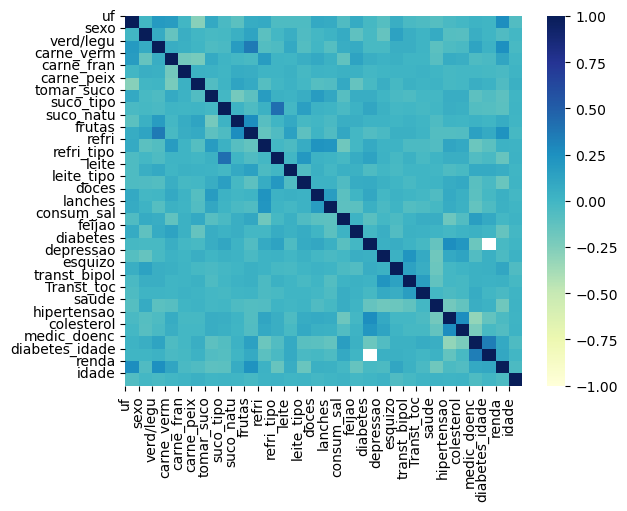

In [57]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [58]:
df.corrwith(df["diabetes"])

uf               -0.023380
sexo             -0.030526
verd/legu        -0.029501
carne_verm        0.051128
carne_fran       -0.011496
carne_peix       -0.030499
tomar_suco        0.055494
suco_tipo         0.103370
suco_natu         0.016460
frutas           -0.069273
refri             0.084481
refri_tipo        0.126593
leite            -0.047440
leite_tipo        0.073645
doces             0.097355
lanches           0.042991
consum_sal       -0.093831
feijao           -0.014739
diabetes          1.000000
depressao         0.042422
esquizo           0.059344
transt_bipol      0.023090
Transt_toc       -0.022854
saude            -0.142068
hipertensao       0.261845
colesterol        0.206403
medic_doenc      -0.170042
diabetes_idade         NaN
renda            -0.030392
idade             0.001113
dtype: float64

## checagem de valores ausentes

In [59]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
suco_tipo : True -> 56301
refri_tipo : True -> 46470
leite_tipo : True -> 25004
esquizo : True -> 79048
transt_bipol : True -> 79048
Transt_toc : True -> 79048
hipertensao : True -> 777
colesterol : True -> 2204
medic_doenc : True -> 79048
diabetes_idade : True -> 76699
renda : True -> 21


In [60]:
# quantos dados temos no dataset
len(df.index)

83800

In [61]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 1].index)

7101

In [62]:
# quantos individuos com diabetes negada
len(df[df['diabetes'] == 2].index)

76699

## separação dos dados com mesma proporção de indivíduos com diabetes e sem diabetes

In [63]:
dados_1 = df[df['diabetes'] == 1]
dados_2 = df[df['diabetes'] == 2]
total_instancias_1 = len(dados_1)
dados_2_selecionados = dados_2.sample(n=total_instancias_1, random_state=12)
df = pd.concat([dados_1, dados_2_selecionados])

In [64]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 1].index)

7101

In [65]:
# quantos individuos com diabetes negada
len(df[df['diabetes'] == 2].index)

7101

<AxesSubplot:xlabel='diabetes', ylabel='count'>

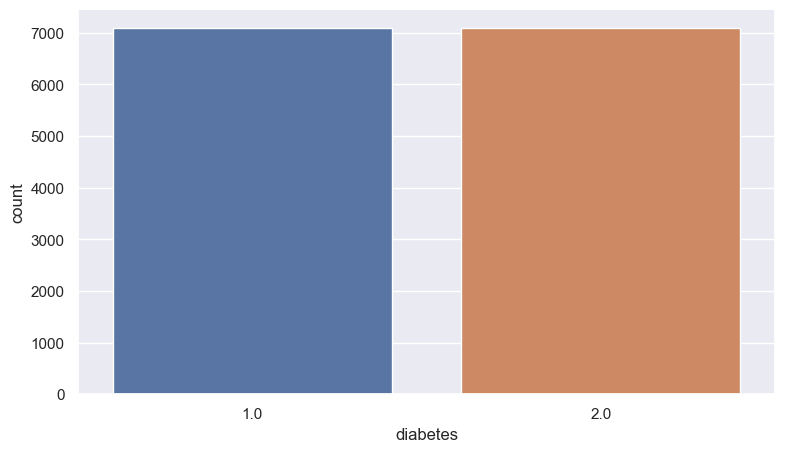

In [66]:
# em gráfico

sns.set()
sns.set(rc = {'figure.figsize':(9,5)})
sns.countplot(x="diabetes",data=df)

In [67]:
df.to_csv('proc_dataset[balanced].csv', index=False)

## Remoção de colunas com muitos valores nulos

In [68]:
df = pd.read_csv('proc_dataset[balanced].csv')

In [69]:
df.drop(['esquizo', 'transt_bipol', 'Transt_toc', 'medic_doenc','suco_tipo', 'leite_tipo', 'refri_tipo'],axis=1, inplace=True)

In [70]:
df.to_csv('proc_dataset[null_cull].csv', index=False)

## Análise numérica

In [71]:
df = pd.read_csv('proc_dataset[null_cull].csv')

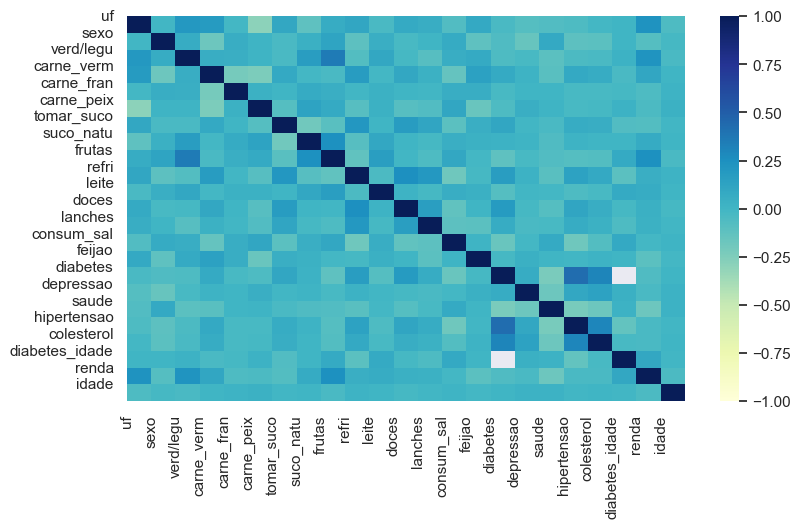

In [72]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [73]:
# Variabilidade de cada variável

df.std()

uf                  11.418965
sexo                 0.495664
verd/legu            2.428083
carne_verm           2.081068
carne_fran           1.796744
carne_peix           1.493807
tomar_suco           1.959565
suco_natu            2.424509
frutas               2.479540
refri                1.665283
leite                3.028184
doces                2.027178
lanches              0.986908
consum_sal           0.759808
feijao               2.336907
diabetes             0.500018
depressao            0.321210
saude                0.816482
hipertensao          0.497916
colesterol           0.446281
diabetes_idade      15.065001
renda                1.498590
idade             1929.793575
dtype: float64

uf : 0.30459597300555347
sexo : -0.26568421695318356
verd/legu : -0.4313145473009607
carne_verm : 0.4630008856689753
carne_fran : 0.5732216703313672
carne_peix : 1.748964843196333
tomar_suco : 2.0522251531287354
suco_natu : 0.6158738088240922
frutas : -0.31264051880527716
refri : 2.2758326608759454
leite : -0.18872166876877625
doces : 1.6191877996506663
lanches : 4.036963790672495
consum_sal : 0.03597871035275547
feijao : -0.8282770817644679
diabetes : 0.0
depressao : -2.386220115608063
saude : 0.6082645822717604
hipertensao : -0.18397617962417867
colesterol : -1.010694328803905


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


diabetes_idade : -0.703345448504704
renda : 0.4532795962947765
idade : 4.7473479327025565


<Figure size 2000x1500 with 0 Axes>

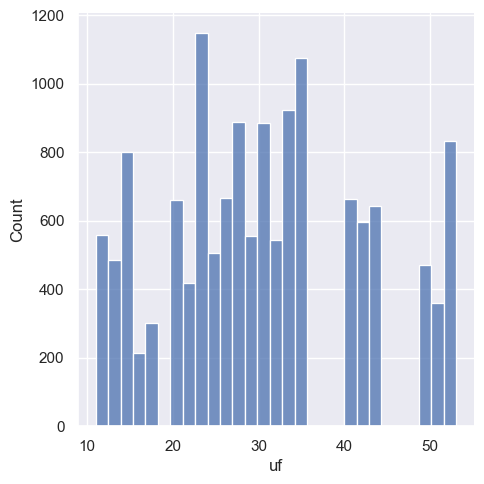

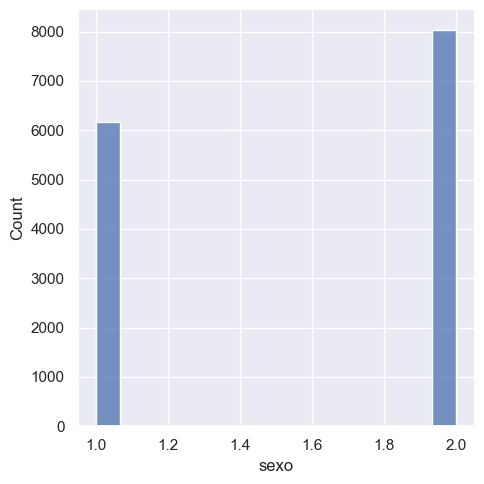

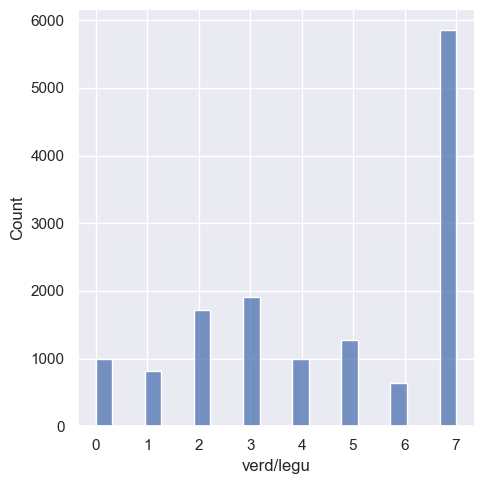

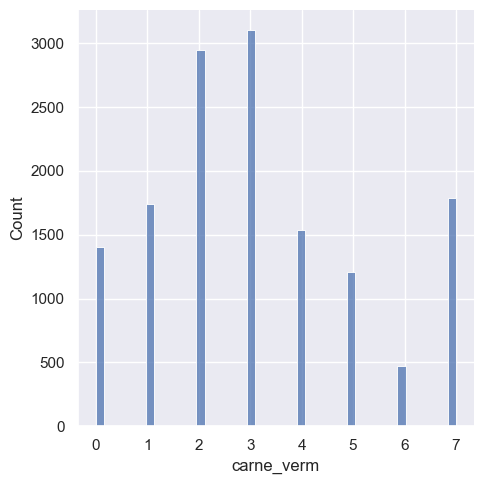

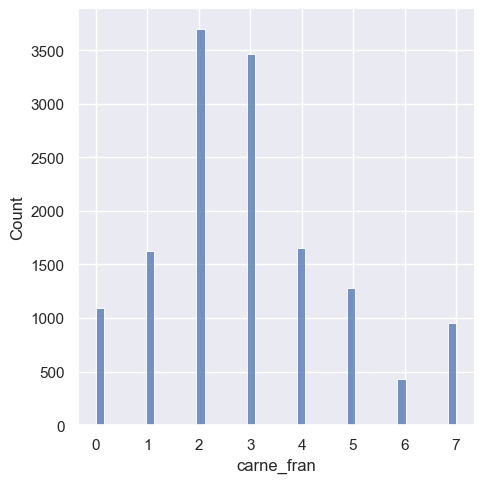

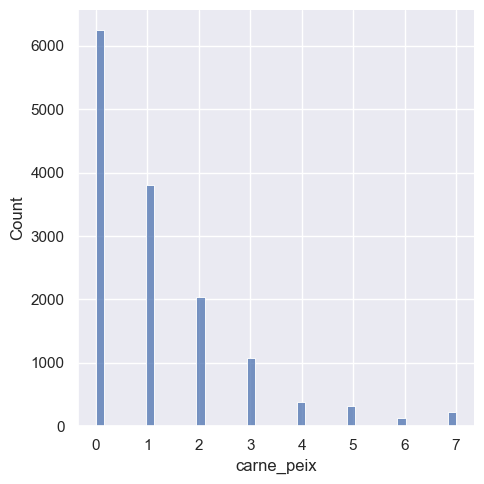

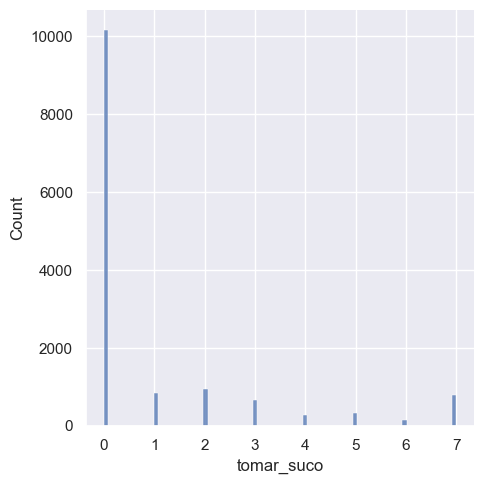

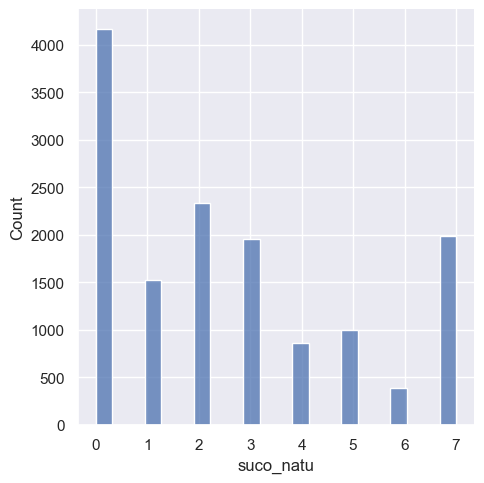

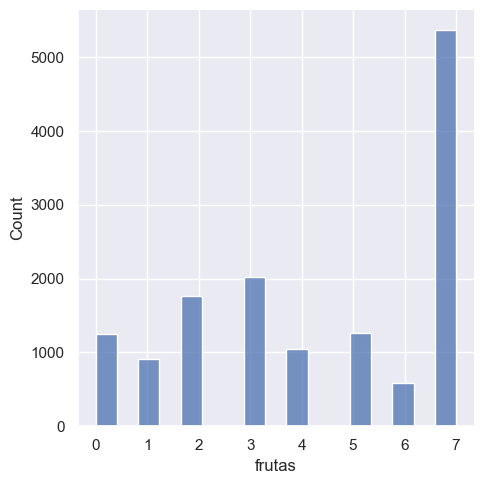

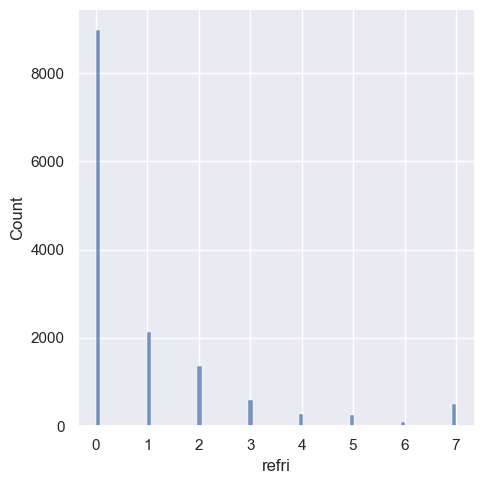

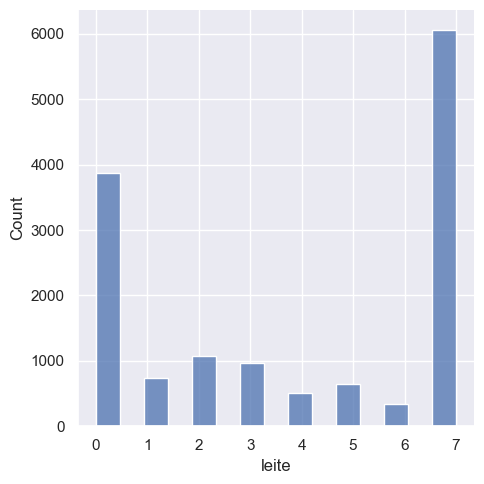

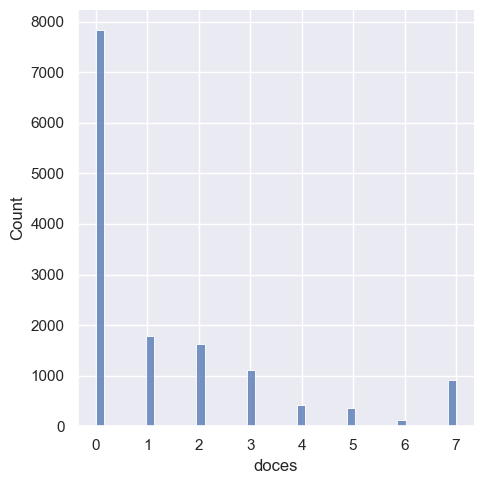

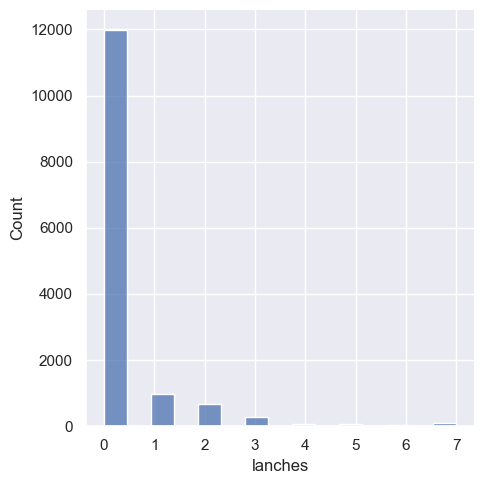

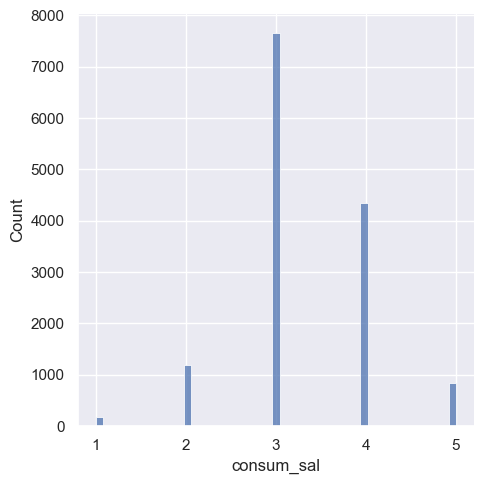

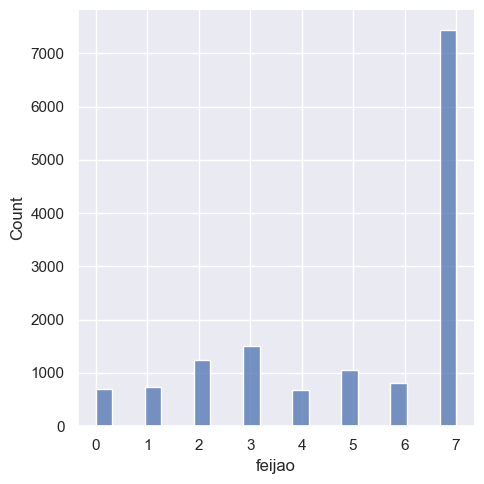

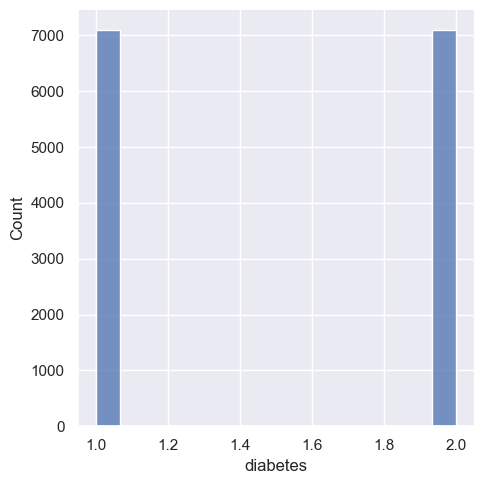

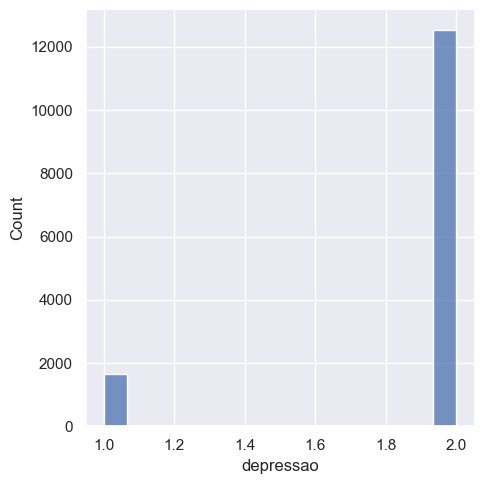

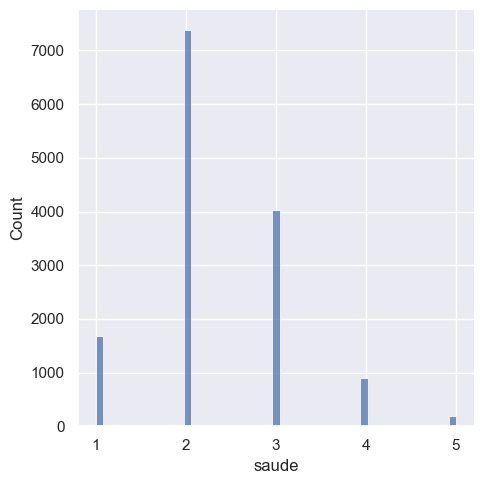

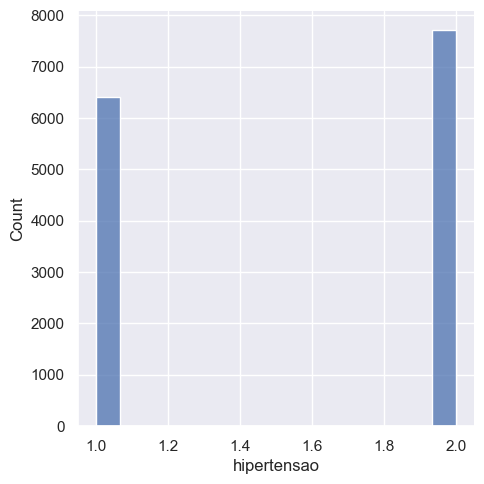

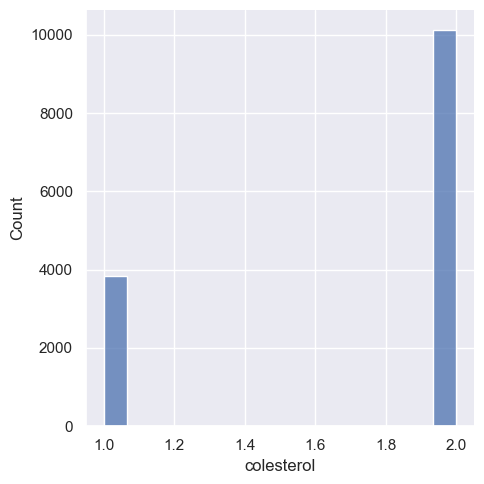

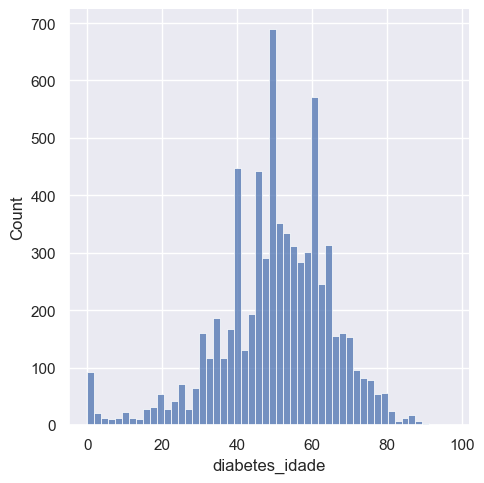

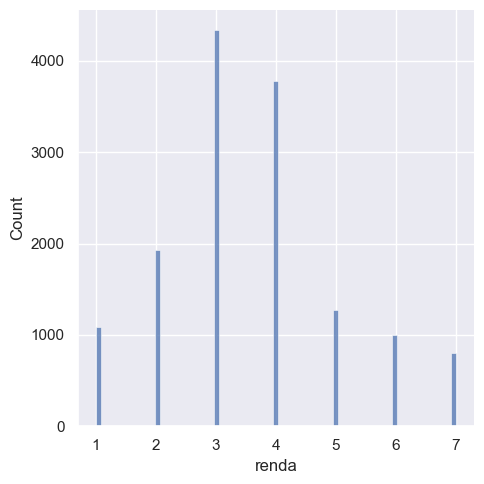

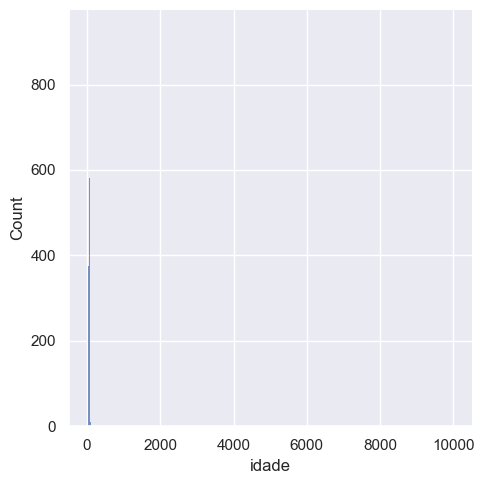

In [74]:
# Verificar as distribuições normais entre as variáveis contínuas

plt.figure(figsize=(20,15))
j=1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        sns.displot(df[i])
        #plt.subplot(2,3,j)
        j+=1
        print(df[i].name, ':', df[i].skew())
#plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'imc'

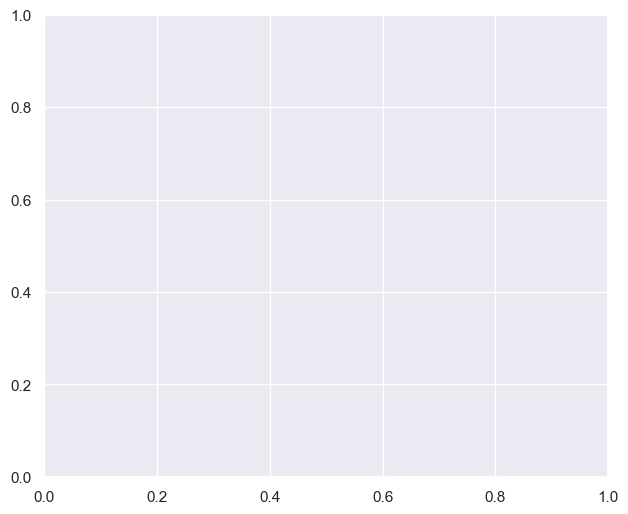

In [75]:
sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

# Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x="diabetes", y="imc", data=df)
bp_ax.set_title('Box plot', fontsize = 20)

# Função Densidade de Probabilidade
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x='imc', hue='diabetes', data=df)
dp_ax.set_title('Density plot', fontsize = 20)

# Boxplots: Distribuição do atributo (age) para cada classe de saída (survived), além de fornecer informações sobre os outliers
# Gráficos de densidade : Distribuição e a forma da distribuição (semelhante a normal ou qualquer outra distribuição) do atributo
# Gráficos de contagem empilhados: Informa sobre a contagem de cada categoria do atributo, e com informações sobre a porcentagem de cada categoria

In [ ]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].max())

Valores ausentes (NaN) em:
uf : False -> 53
sexo : False -> 2.0
verd/legu : False -> 7.0
carne_verm : False -> 7.0
carne_fran : False -> 7.0
carne_peix : False -> 7.0
tomar_suco : False -> 7.0
suco_natu : False -> 7.0
frutas : False -> 7.0
refri : False -> 7.0
leite : False -> 7.0
doces : False -> 7.0
lanches : False -> 7.0
consum_sal : False -> 5.0
feijao : False -> 7.0
diabetes : False -> 2.0
depressao : False -> 2.0
saude : False -> 5.0
exercicio : True -> 7.0
hipertensao : True -> 2.0
colesterol : True -> 2.0
diabetes_idade : True -> 97.0
renda : True -> 7.0
imc : True -> 0.0052979547687111
idade : False -> 9999.0


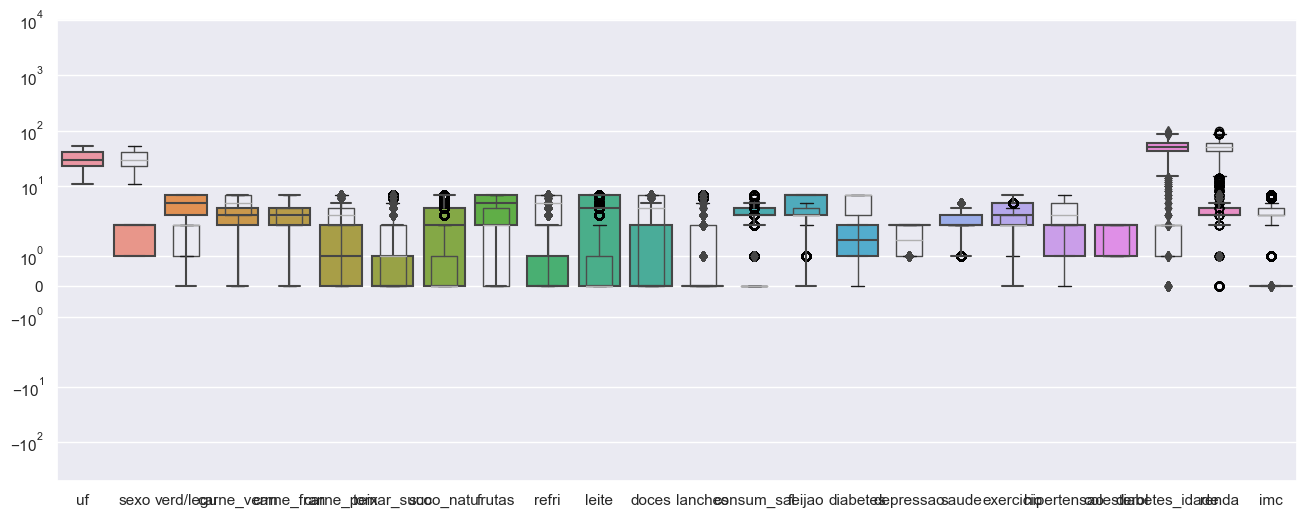

In [ ]:
# Boxplot de todos os atributos contínuos antes da padronização

df.boxplot()
cols = [col for col in df.columns if col != 'idade']
sns.boxplot(data=df[cols])
plt.yscale('symlog')

In [ ]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
exercicio : True -> 9187
hipertensao : True -> 85
colesterol : True -> 246
diabetes_idade : True -> 7101
renda : True -> 2
imc : True -> 13129
